**The image_segmentation function aims to apply image segmentation to an input image original_img using a pixel comparison technique, along with thresholding to create a binary image.**

# **pixel comparison technique**

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def image_segmentation(original_img, _threshold=250):
    # Apply bilateral filter to the original image to smooth the image
    # while preserving edges. Parameters (9, 75, 75) control the size
    # of the filter and the sigma values for color and space.
    J = cv2.bilateralFilter(original_img, 9, 75, 75)

    # Convert the filtered image to a NumPy array and get its shape (m, n, p).
    # m: height (rows), n: width (columns), p: number of channels.
    a = np.array(J)
    m, n, p = a.shape

    # Neighbor Pixel Comparison: Iterate over the image excluding the edges (1 to m-1, 1 to n-1).
    for r in range(1, m-1):
        for c in range(1, n-1):
            # Current pixel value at position (r, c).
            s = J[r, c]

            # Values of the 8 neighboring pixels (above, below, left, right, diagonals).
            n1 = J[r+1, c]   # Below
            n2 = J[r-1, c]   # Above
            n3 = J[r, c+1]   # Right
            n4 = J[r, c-1]   # Left
            n5 = J[r-1, c-1] # Top-left diagonal
            n6 = J[r+1, c+1] # Bottom-right diagonal
            n7 = J[r+1, c-1] # Bottom-left diagonal
            n8 = J[r-1, c+1] # Top-right diagonal

            # Compute differences between the current pixel and its neighbors.
            s1 = s - n1
            s2 = s - n2
            s3 = s - n3
            s4 = s - n4
            s5 = s - n5
            s6 = s - n6
            s7 = s - n7
            s8 = s - n8

            # Define the threshold for pixel intensity differences.
            threshold = _threshold

            # If all differences are less than the threshold, it means the pixel
            # is part of a homogeneous region, so we set it to 0 (black).
            # Otherwise, retain the original pixel value.
            if (all(s1 < threshold) and all(s2 < threshold) and all(s3 < threshold) and
                all(s4 < threshold) and all(s5 < threshold) and all(s6 < threshold) and
                all(s7 < threshold) and all(s8 < threshold)):
                J[r, c] = 0
            else:
                J[r, c] = s

    # Apply binary thresholding to the processed image.
    # Pixels with intensity greater than 110 become 0 (black) and less than 110 become 255 (white).
    # The 'cv2.THRESH_BINARY_INV' argument inverts the result.
    ret, final_img = cv2.threshold(J, 110, 255, cv2.THRESH_BINARY_INV)

    # Return the segmented binary image.
    return final_img


In [4]:
def print_image(img_path, img_name):
    # Read the image from the given path using OpenCV's imread function.
    img_original = cv2.imread(img_path)

    # Resize the image to 200x200 pixels using cubic interpolation for smooth resizing.
    img_original = cv2.resize(img_original, (200, 200), interpolation=cv2.INTER_CUBIC)

    # Convert the image from BGR (OpenCV's default color format) to RGB for correct display in Matplotlib.
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    # Create a figure for displaying the images, with a specific figure size of 18x4 inches.
    plt.figure(figsize=(18, 4))

    # Add the first subplot to display the original image.
    plt.subplot(1, 6, 1)  # 1 row, 6 columns, this is the first subplot.
    plt.gca().set_title('Original')  # Set the title to 'Original'.
    plt.imshow(img_original)  # Display the original image.
    plt.axis('off')  # Turn off axis lines and labels for clean visualization.

    # Loop over different threshold values (50, 100, 150, 200) and create subplots for each thresholded image.
    for pos, thrs in enumerate([50, 100, 150, 200], start=2):
        # Perform image segmentation using the current threshold value.
        img_seg = image_segmentation(img_original, thrs)

        # Add a new subplot for the segmented image based on the current threshold.
        plt.subplot(1, 6, pos)  # Add the subplot in positions 2 to 5.
        plt.gca().set_title('Threshold - ' + str(thrs))  # Set title indicating the threshold value.
        plt.imshow(img_seg)  # Display the segmented image.
        plt.axis('off')  # Turn off the axis lines and labels.

    # Add the final subplot to display the negative (inverted color) version of the original image.
    plt.subplot(1, 6, 6)  # Add the subplot in the 6th position.
    plt.gca().set_title('Negative')  # Set title to 'Negative'.

    # Create a negative image by subtracting the pixel values from 255.
    plt.imshow(255 - np.array(img_original))  # Invert colors and display.
    plt.axis('off')  # Turn off axis lines and labels.

    # Adjust the layout so that subplots fit neatly within the figure, avoiding overlap.
    plt.tight_layout()

    # Save the resulting figure (all images) to a file with the specified image name.
    plt.savefig(img_name)

    # Display the final image with all subplots.
    plt.show()


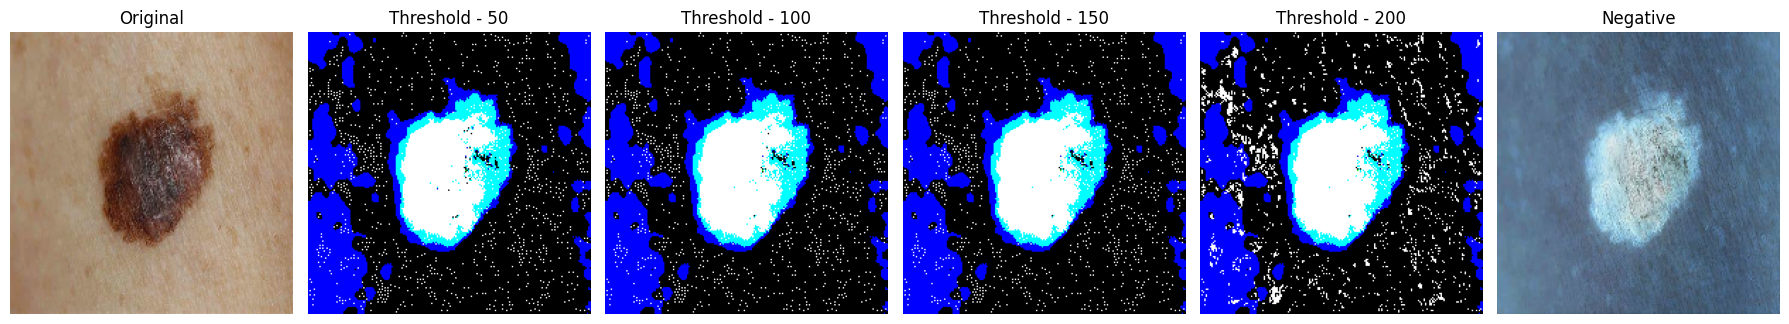

In [8]:
# Corrected source location for Brain MRI dataset images
src = ['../content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg',
       ]

# Destination directory for preprocessed images
dest = 'Skin Cancer'

# Create the directory if it doesn't exist
os.makedirs(f"./{dest}", exist_ok=True)

# Loop over the source images, ensuring we don't exceed the available images
for idx in range(len(src)):
    # Define the output path for the preprocessed image
    img_path = f"./{dest}/{dest}_{str(idx+1)}.jpg"

    # Call the print_image function to process and save the image
    print_image(src[idx], img_path)



# Region Based Segmentation

To use the Sobel filter on all three color channels and display the elevation maps for each channel


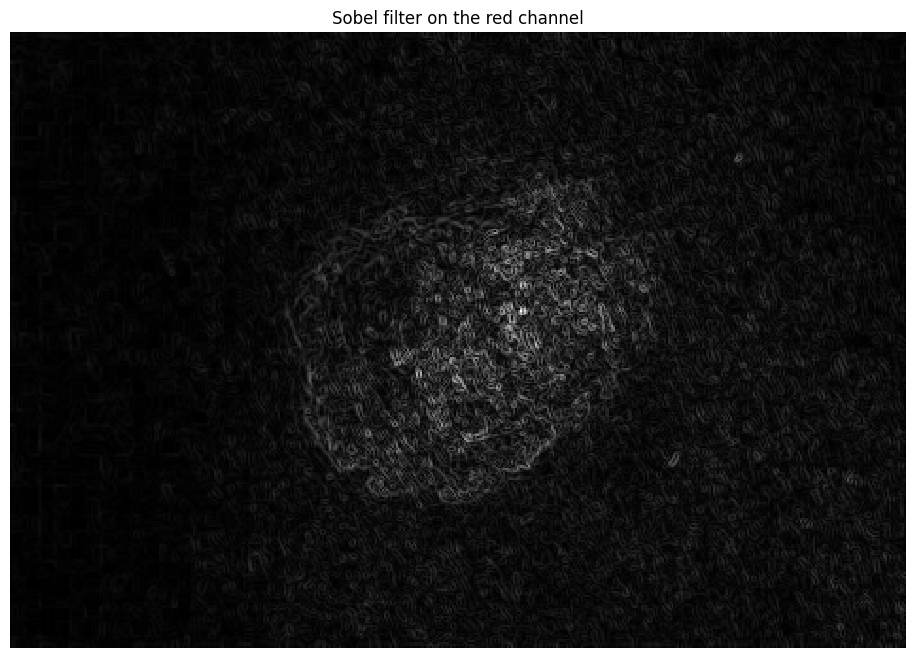

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel

# Load your color image (ensure the path is correctly formatted for Windows)
image_path = r"/content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg"
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Extract the red channel (2 corresponds to the red channel in OpenCV)
    red_channel = image[:, :, 2]  # 2 corresponds to the red channel, 1 to green, 0 to blue

    # Compute the elevation map using the Sobel filter on the red channel
    elevation_map = sobel(red_channel)

    # Create a Matplotlib figure and display the elevation map
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
    ax.axis('off')
    ax.set_title('Sobel filter on the red channel')
    plt.show()


Text(0.5, 1.0, 'Region Based Segmentation:  Sobel filter on the red channel markers')

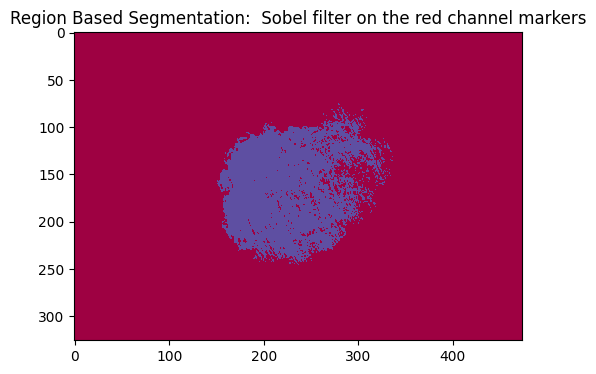

In [47]:
# Initialize markers with zeros (background)
markers = np.zeros_like(red_channel)

# Set marker value for pixels with red channel values less than 117 (foreground)
markers[red_channel < 117] = 1

# Set marker value for pixels with red channel values greater than 232 (background)
markers[red_channel > 232] = 2

# Display the markers image with titles and without axis
fig, ax = plt.subplots(figsize=(8, 4))

# Display the markers with 'Spectral' colormap to distinguish different marker values
ax.imshow(markers, cmap='Spectral', interpolation='nearest')


ax.set_title('Region Based Segmentation:  Sobel filter on the red channel markers')

# watershed segmentation

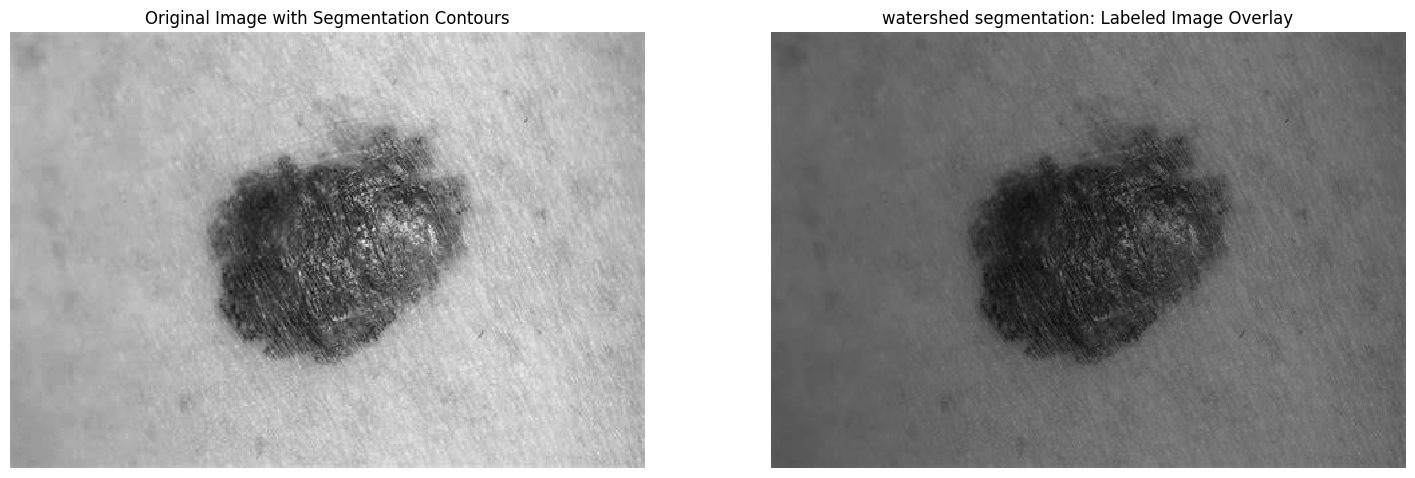

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data, measure
from skimage.morphology import binary_erosion, binary_dilation
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.color import label2rgb
from scipy import ndimage as ndi
from skimage.filters import sobel

# Load your grayscale image
imm = cv2.imread("/content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg", cv2.IMREAD_GRAYSCALE)

# Compute the elevation map using the Sobel filter on the grayscale image
elevation_map = sobel(imm)

# Create markers based on thresholding the grayscale image
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

# Apply watershed segmentation
segmentation = watershed(elevation_map, markers)

# Fill holes in the segmented regions
segmentation = ndi.binary_fill_holes(segmentation - 1)

# Label the segmented regions
labeled_mountains, _ = ndi.label(segmentation)

# Overlay the labels on the original image
image_label_overlay = label2rgb(labeled_mountains, image=imm, bg_label=0)

# Create subplots to display the original image, contours, and the labeled image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# Display the original image with contours
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_title('Original Image with Segmentation Contours')

# Display the labeled image overlay
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax2.set_title('watershed segmentation: Labeled Image Overlay')

plt.show()


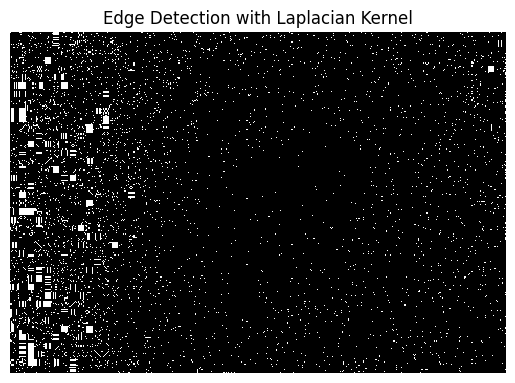

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Load your grayscale image
image_path = "/content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg"
gray_segmented_2 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image loaded correctly
if gray_segmented_2 is None:
    raise ValueError("Error: Image not found or unable to load.")

# Define the Laplacian kernel
kernel_laplace = np.array([[1, 1, 1],
                           [1, -8, 1],
                           [1, 1, 1]])

# Apply the convolution with the Laplacian kernel
out_l = ndi.convolve(gray_segmented_2, kernel_laplace, mode='reflect')

# Post-process the output to highlight edges
arr = np.where(out_l == 0, 0, -100)

# Display the result
plt.imshow(arr, cmap='gray', interpolation='nearest')
plt.axis('off')  # Hide the axes
plt.title('Edge Detection with Laplacian Kernel')
plt.show()


(326, 474, 3) (326, 474, 3) (326, 474)


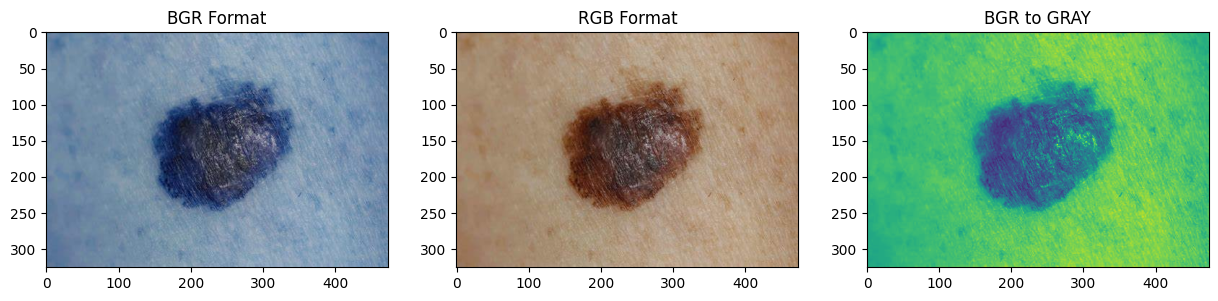

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#reading image
path = path = r"/content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg"
img = cv2.imread(path)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(path,0) # or cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2)
    plt.show()

imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

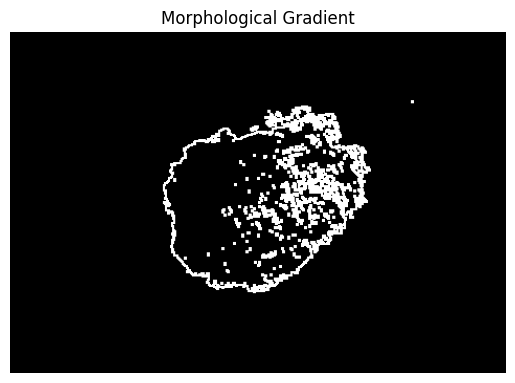

In [33]:
#converting to gray scale
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize image
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

#define kernel
kernel = np.ones((3, 3), np.uint8)

#invert image
invert = cv2.bitwise_not(binr)

# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

# Display the result
plt.imshow(morph_gradient, cmap='gray')
plt.title('Morphological Gradient')  # Add title to the plot
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

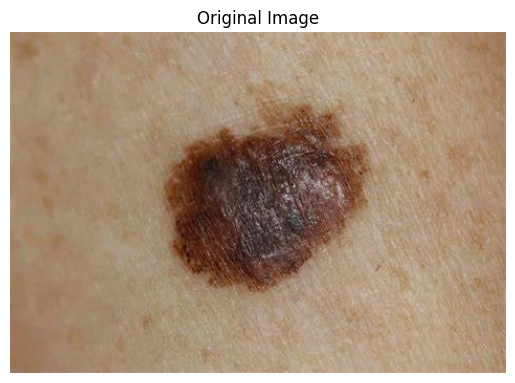

In [43]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the image
path = r"/content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg"

# Load the image
img1 = cv2.imread(path)

# Convert BGR to RGB
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Hide axes for a cleaner look
plt.show()





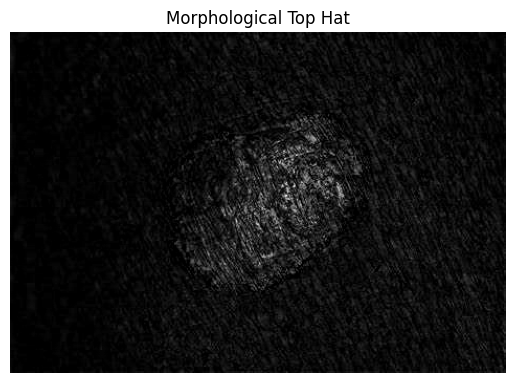

In [40]:
# Perform morphological top hat transformation
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

# Display the top hat result
plt.imshow(tophat, cmap='gray')
plt.title('Morphological Top Hat')
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

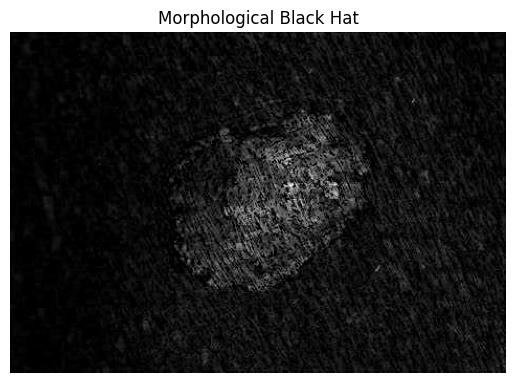

In [41]:
# Perform morphological black hat transformation
blackhat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_BLACKHAT, kernel)

# Display the black hat result
plt.imshow(blackhat, cmap='gray')
plt.title('Morphological Black Hat')
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

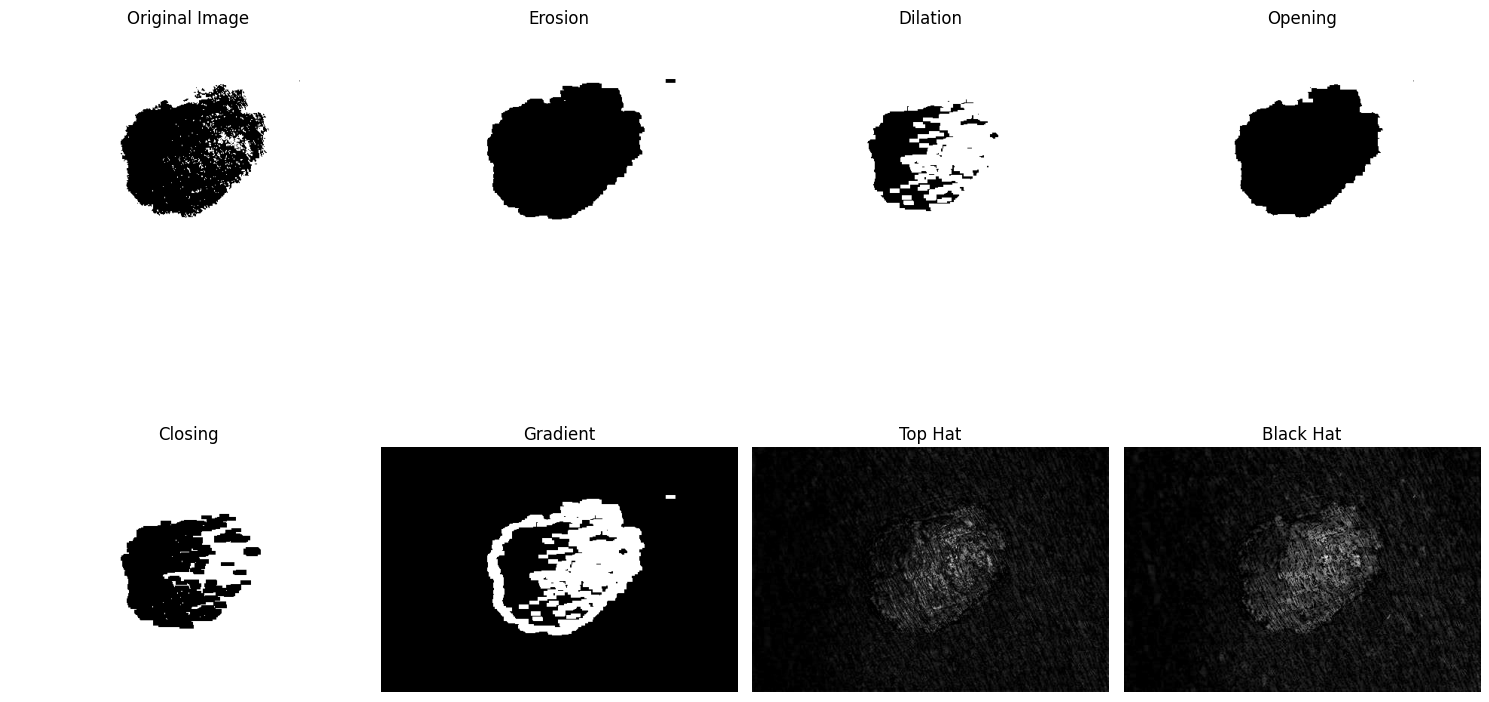

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
path = r"/content/drive/MyDrive/Jupyter Notebook Research Code/Threshold region and morphological seg/Skin Cancer.jpg"
img = cv2.imread(path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarize the image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define a kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))

# Apply morphological operations
erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

# Display results
titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Top Hat', 'Black Hat']
images = [binary, erosion, dilation, opening, closing, gradient, tophat, blackhat]

plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
